In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("data/votes.xlsx")

In [3]:
# siehe: https://github.com/voto-vote/.github/blob/main/docs/algorithm.md
matrix = [
    [1.0, 0.5, 0.0, -0.5, -1.0],
    [0.5, 0.75, 0.25, -0.25, -0.5],
    [0.0, 0.25, 0.5, 0.25, 0.0],
    [-0.5, -0.25, 0.25, 0.75, 0.5],
    [-1.0, -0.5, 0.0, 0.5, 1.0],
]

In [4]:
# Berechne Voto Score zwischen p1 und p2. Ignoriere Favoriten
def get_voto_score(p1, p2):
    df_rel = df.query("parteien.isin([@p1, @p2])").pivot(columns="parteien", index="shorttitle", values="votes")
    df_rel = df_rel[df_rel[p1] != '-']
    df_rel[p1] = df_rel[p1].astype(int)
    df_rel[p2] = df_rel[p2].astype(int)
    df_rel['punktzahl'] = df_rel.apply(lambda x: matrix[x[p1]-1][x[p2]-1], axis = 1)
    return (df_rel.punktzahl.sum() + len(df_rel))/(len(df_rel)*2)

In [5]:
# Berechne Score zwischen allen Parteien
parteien = df.parteien.unique().tolist()
dfs = []
for p1 in parteien:
    for p2 in parteien:
        if p1 == p2:
            score=1
        else:
            score = get_voto_score(p1,p2)
        dfs.append(
            pd.DataFrame({
                'p1': p1,
                'p2': p2,
                'voto_score': score
            }, index = [None])
        )

df_scores = pd.concat(dfs)

In [6]:
df_scores.pivot(columns="p2", index = "p1", values="voto_score").to_excel("data/voto_score_matrix.xlsx")

-----------
Darstellung als Clustermap

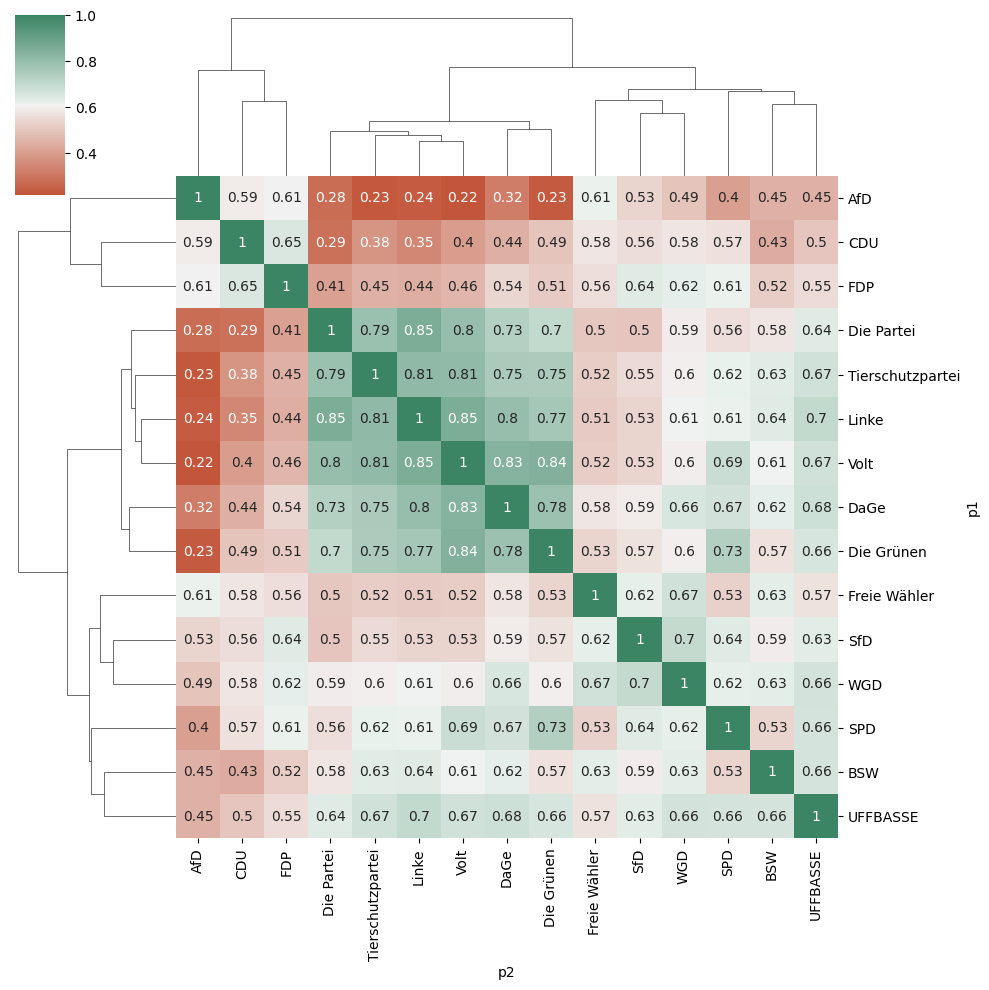

In [9]:
import seaborn as sns
cm = sns.clustermap(df_scores.pivot(columns="p2", index = "p1", values="voto_score"), cmap = sns.diverging_palette(20, 150, as_cmap=True), annot = True)

In [8]:
cm.savefig("plots/clustermap_parteien_x_parteien.png")